In [9]:
!pip install numpy
!pip install sympy
!pip install scipy
!pip install mpl_toolkits
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [10]:
# %matplotlib widget
# %matplotlib inline
from scipy.optimize import fsolve
# from scipy.differentiate import hessian
import numpy as np
from numpy import einsum
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from IPython.display import HTML
from matplotlib import animation

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [ ]:
def plotta_subplots(
    nrows=1,
    ncols=1,
    fig_size=(10, 5),
    fig_title="Figure",
    subplot_instructions=None,  # List of dicts, one per subplot
    suptitle=None,
    savefig=True,
    show=True
):
    """
    Flexible multi-subplot plotting function.
    Each subplot is described by a dict with keys:
      - plotstyle: 'plot', 'scatter', 'contour', 'contourf', 'surface'
      - x1_data, x2_data, x3_data, color, linestyle, marker, cmap, levels, title, xlabel, ylabel, zlabel, frame, elev, azim
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=fig_size, squeeze=False, subplot_kw={'projection': None})
    axes = axes.flatten()
    if subplot_instructions is None:
        subplot_instructions = [{} for _ in range(nrows * ncols)]
    for idx, instr in enumerate(subplot_instructions):
        ax = axes[idx]
        plotstyle = instr.get("plotstyle", "plot")
        x1_data = instr.get("x1_data", None)
        x2_data = instr.get("x2_data", None)
        x3_data = instr.get("x3_data", None)
        color = instr.get("color", "b")
        linestyle = instr.get("linestyle", "-")
        marker = instr.get("marker", None)
        cmap = instr.get("cmap", "viridis")
        levels = instr.get("levels", 50)
        title = instr.get("title", f"Subplot {idx+1}")
        xlabel = instr.get("xlabel", "x1")
        ylabel = instr.get("ylabel", "x2")
        zlabel = instr.get("zlabel", "Z")
        frame = instr.get("frame", None)
        elev = instr.get("elev", 30)
        azim = instr.get("azim", 45)

        if plotstyle == "plot":
            ax.plot(x1_data, x2_data, color=color, linestyle=linestyle, marker=marker)
        elif plotstyle == "scatter":
            ax.scatter(x1_data, x2_data, color=color, marker=marker)
        elif plotstyle in ["contour", "contourf"]:
            if x3_data is None:
                raise ValueError("x3_data (Z values) required for contour plots")
            if plotstyle == "contour":
                cp = ax.contour(x1_data, x2_data, x3_data, levels=levels, cmap=cmap)
            else:
                cp = ax.contourf(x1_data, x2_data, x3_data, levels=levels, cmap=cmap)
            fig.colorbar(cp, ax=ax)
        elif plotstyle == "surface":
            # For 3D, need to convert axis to 3D
            ax.remove()
            ax = fig.add_subplot(nrows, ncols, idx+1, projection="3d")
            surf = ax.plot_surface(x1_data, x2_data, x3_data, cmap=cmap)
            ax.set_zlabel(zlabel)
            ax.view_init(elev=elev, azim=azim)
            fig.colorbar(surf, ax=ax)
        else:
            raise ValueError(f"Unknown plotstyle: {plotstyle}")

        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        if frame is not None:
            ax.axis(frame)

    if suptitle:
        fig.suptitle(suptitle)
    plt.tight_layout()
    if savefig:
        plt.savefig(fig_title + ".png")
    if show:
        plt.show()
    return fig, axes



# plotta_subplots(
#     nrows=1,
#     ncols=2,
#     fig_size=(12, 5),
#     fig_title="MultiPlot",
#     subplot_instructions=[
#         {
#             "plotstyle": "plot",
#             "x1_data": v1_2d[100, :],
#             "x2_data": x2_2d[100, :],
#             "color": "b",
#             "title": "Line Plot",
#             "xlabel": "v1",
#             "ylabel": "x2"
#         },
#         {
#             "plotstyle": "contourf",
#             "x1_data": x1_2d,
#             "x2_data": x2_2d,
#             "x3_data": v1_2d,
#             "cmap": "plasma",
#             "title": "Contour Plot",
#             "xlabel": "x1",
#             "ylabel": "x2"
#         }
#     ],
#     suptitle="Velocity Profiles"
# )

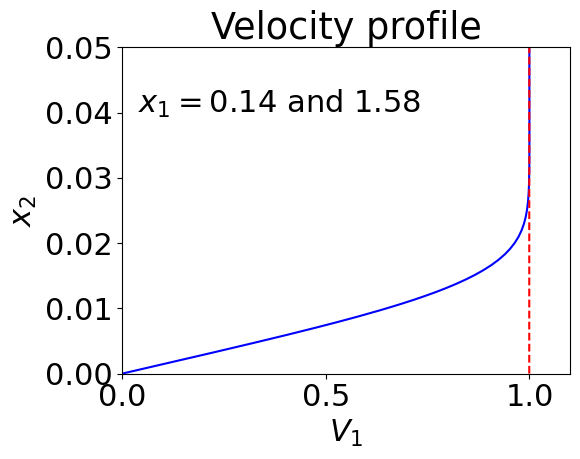

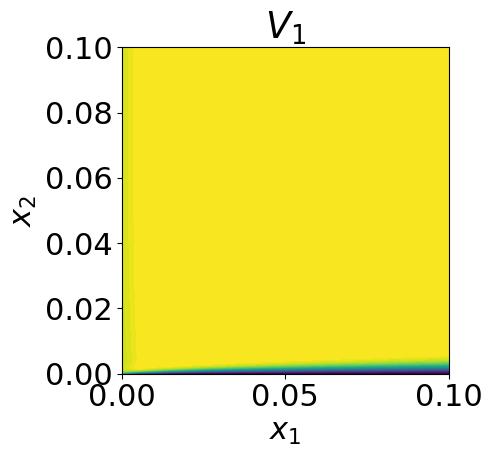

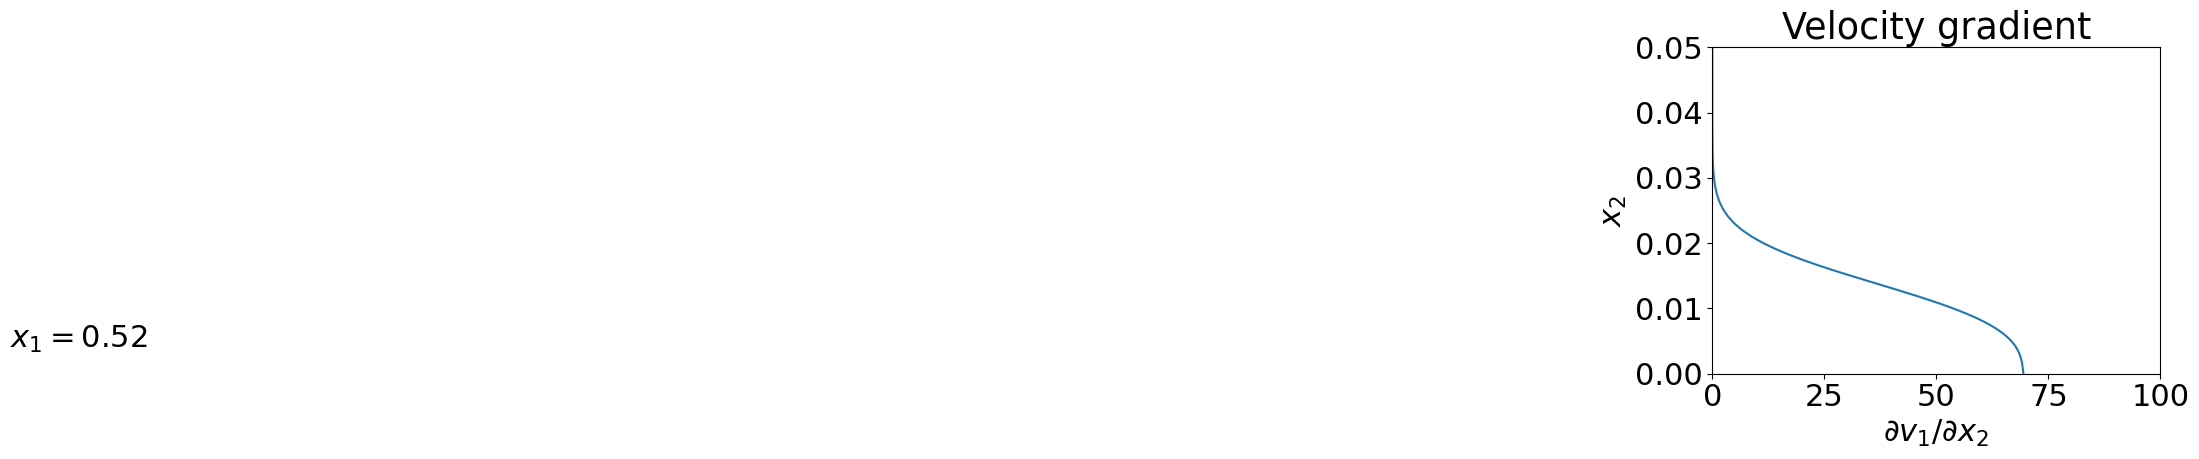

In [13]:
plt.rcParams.update({'font.size': 22})

viscos=1.52e-5

xc=np.loadtxt("xc.dat")
yc=np.loadtxt("yc.dat")

i_lower_sym=20 # the flat plate starts at i=i_lower_sym+1
# boundary layer flow
data=np.genfromtxt("boundary_layer_data.dat", comments="%")

ni=252  # number of grid nodes in x_1 direction
nj=200  # number of grid nodes in x_2 direction

v1=data[:,0] #don't use this array
v2=data[:,1] #don't use this array
p=data[:,2]  #don't use this array

# transform the arrays from 1D fields x(n) to 2D fields x(i,j)
# the first index 'i', correponds to the x-direction
# the second index 'j', correponds to the y-direction

v1_2d=np.reshape(v1,(ni,nj)) #this is v_1 (streamwise velocity component)
v2_2d=np.reshape(v2,(ni,nj)) #this is v_1 (wall-normal velocity component)
p_2d=np.reshape(p,(ni,nj))   #this is p   (pressure)

#v1_2d=np.transpose(v1_2d)
#v2_2d=np.transpose(v2_2d)
#p_2d=np.transpose(p_2d)

# scale u and v with max u
for i in range (0,ni-1):
   v1_2d[i,:]=v1_2d[i,:]/max(v1_2d[i,:])
   v2_2d[i,:]=v2_2d[i,:]/max(v1_2d[i,:])


blasius=np.genfromtxt("blasius.dat", comments="%")
xi_blas=blasius[:,0]
g_blas=blasius[:,1]
u_blas=blasius[:,2]

#   a control volume, CV. 
#
#  xp(i), yp(j) denote the center of the, CV. u, v and p are stored at (xp,yp)
#
#  xc(i) yc(j) denote the corner (on the high side) of the CV
#
#
#   x-------------------------x  xc(i), yc(j)
#   |                         |
#   |                         |
#   |                         |
#   |                         |
#   |          o xp(i), yp(j) |
#   |                         |
#   |                         |
#   |                         |
#   |                         |
#   x-------------------------x
#
# compute xp
xp=np.zeros(ni)
xp[0]=xc[0]
for i in range (1,ni-1):
   xp[i]=0.5*(xc[i]+xc[i-1])

xp[ni-1]=xc[ni-2]

# compute yp
yp=np.zeros(nj)
yp[0]=yc[0]
for j in range (1,nj-1):
   yp[j]=0.5*(yc[j]+yc[j-1])

yp[nj-1]=yc[nj-2]
#
# make xp and yp 2D arrays
x1_2d=np.zeros((ni,nj))
x2_2d=np.zeros((ni,nj))
for i in range(0,ni-1):
   x2_2d[i,:]=yp

for j in range(0,nj-1):
   x1_2d[:,j]=xp

#
# compute the gradient dudx, dudy
dudx, dudy=np.gradient(v1_2d,xp,yp)


fig_size = (7.5, 7.5)
#************
# velocity profile plot
fig1 = plt.figure("Figure 1")
plt.subplots_adjust(left=0.20,bottom=0.20)
i=170 # plot the velocity profile for i=170
plt.plot(v1_2d[i,:],x2_2d[i,:],'b-')
i=5 # plot the velocity profile for i=5
plt.plot(v1_2d[i,:],x2_2d[i,:],'r--')  #red dashed line
plt.title('Velocity profile')
plt.axis([0,1.1,0,0.05]) # set x & y axis
plt.xlabel('$V_1$') 
plt.ylabel('$x_2$') 
plt.text(0.04,0.04,'$x_1=0.14$ and $1.58$') # show this text at (0.04,0.04)
plt.savefig('velprof.png')

################################ contour plot of v1
fig2 = plt.figure("Figure 2")
plt.subplots_adjust(left=0.20,bottom=0.20)
plt.contourf(x1_2d,x2_2d,v1_2d, 50)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.clim(0.1,1.)
plt.title("contour pressure plot")
plt.axis('scaled')
# only three xticks
plt.locator_params(axis='x', nbins=2)
#ax1.xaxis.set_major_locator(xticks)
plt.axis([0,0.1,0,0.1]) # zoom-in on the first 0.1m from the inlet
plt.title('$V_1$')
plt.savefig('v1_iso.png')

################################ compute the velocity gradient dv_1/dx_2
fig3 = plt.figure("Figure 3")
plt.subplots_adjust(left=0.20,bottom=0.20)
dv1_dx2=np.zeros((ni,nj))
i=170 # plot the velocity gradient for i=170
plt.plot(dudy[i,:],yp)
plt.axis([0,100,0,0.05]) # set x & y axis
plt.title('Velocity gradient')
plt.xlabel(r'$\partial v_1/\partial x_2$')
plt.ylabel('$x_2$') 
plt.text(-380,0.004,'$x_1=0.52$')
plt.savefig('v1_grad.png')

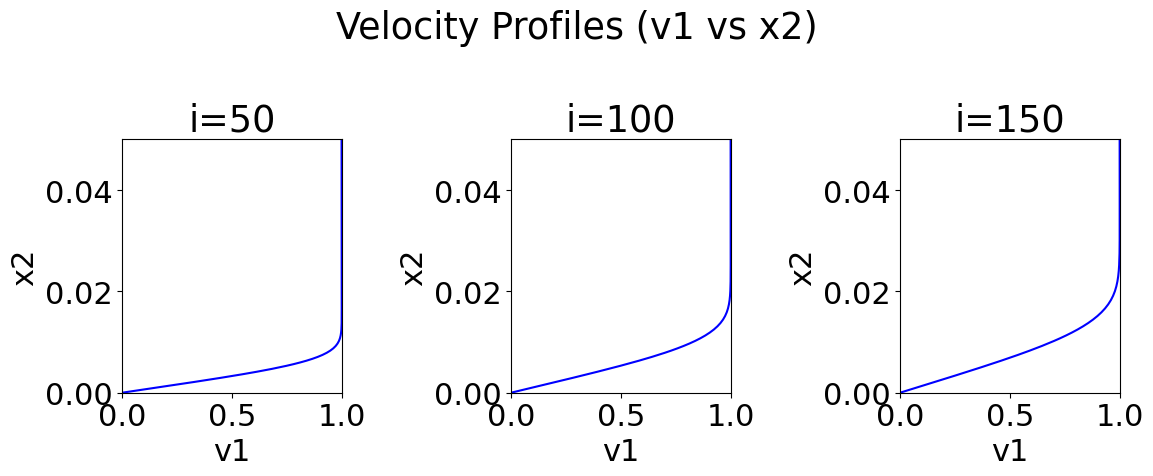

ValueError: x and y must have same first dimension, but have shapes (200,) and (45,)

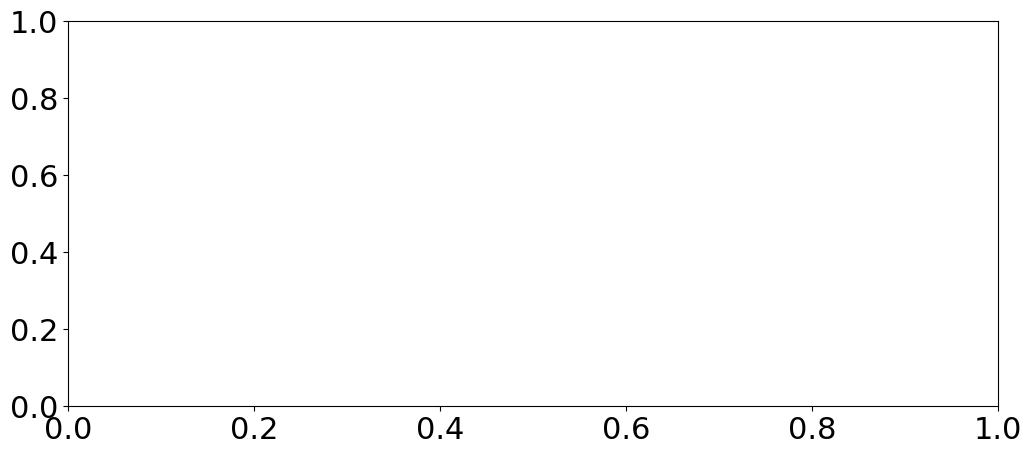

In [ ]:
##################################################
# E1
##################################################

# eqn (3.49)
def nu(xi, x1, x2, V1_inf):
    return (x2 / xi)**2 * (V1_inf / x1)

def xi(x1, x2, nu, V1_inf):
    return x2 * (V1_inf / (nu * x1))**(1/2)



figsize = (6,6)
frame = [0,1,0,0.05]

plotta_subplots(
    nrows=1,
    ncols=3,
    fig_size=(12, 5),
    fig_title="v2 vs x2",
    subplot_instructions=[
        {
            "plotstyle": "plot",
            "x1_data": v1_2d[50, :],
            "x2_data": x2_2d[50, :],
            "color": "b",
            "title": "i=50",
            "xlabel": "v1",
            "ylabel": "x2",
            'frame': frame
        },
        {
            "plotstyle": "plot",
            "x1_data": v1_2d[100, :],
            "x2_data": x2_2d[100, :],
            "color": "b",
            "title": "i=100",
            "xlabel": "v1",
            "ylabel": "x2",
            'frame': frame
        },
        {
            "plotstyle": "plot",
            "x1_data": v1_2d[150, :],
            "x2_data": x2_2d[150, :],
            "color": "b",
            "title": "i=150",
            "xlabel": "v1",
            "ylabel": "x2",
            'frame': frame
        }
    ],
    suptitle="Velocity Profiles (v1 vs x2)"
)

plotta_subplots(
    nrows=1,
    ncols=1,
    fig_size=(12, 5),
    fig_title="v2 vs x2",
    subplot_instructions=[
        {
            "plotstyle": "plot",
            "x1_data": v1_2d[50, :],
            "x2_data": xi_blas,
            "color": "b",
            "title": "i=50",
            "xlabel": "v1",
            "ylabel": "x2",
            'frame': frame
        }
    ],
    suptitle="Velocity Profiles (v1 vs x2)"
)

